In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, accuracy_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import pmdarima as pm
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet

reset_index

expanding windows

arima in samplefit


In [26]:
time_series = pd.read_csv('inflation_time_series.csv')

Food and beverages in U.S. city average, all urban consumers, not seasonally adjusted!

area_code 0

item_code SAF

seasonal U (unadjusted)

periodicity_code R

base_code S

base_period 1982-84=100

In [27]:
time_series.shape

(668, 3)

In [28]:
time_series.head(15)

,Unnamed: 0,date,inflation
0,0,1968-02-01,2.873563
1,1,1968-03-01,3.170029
2,2,1968-04-01,4.034582
3,3,1968-05-01,4.335260
4,4,1968-06-01,3.757225
5,5,1968-07-01,3.438395
6,6,1968-08-01,3.409091
7,7,1968-09-01,3.954802
8,8,1968-10-01,4.261364
9,9,1968-11-01,3.977273


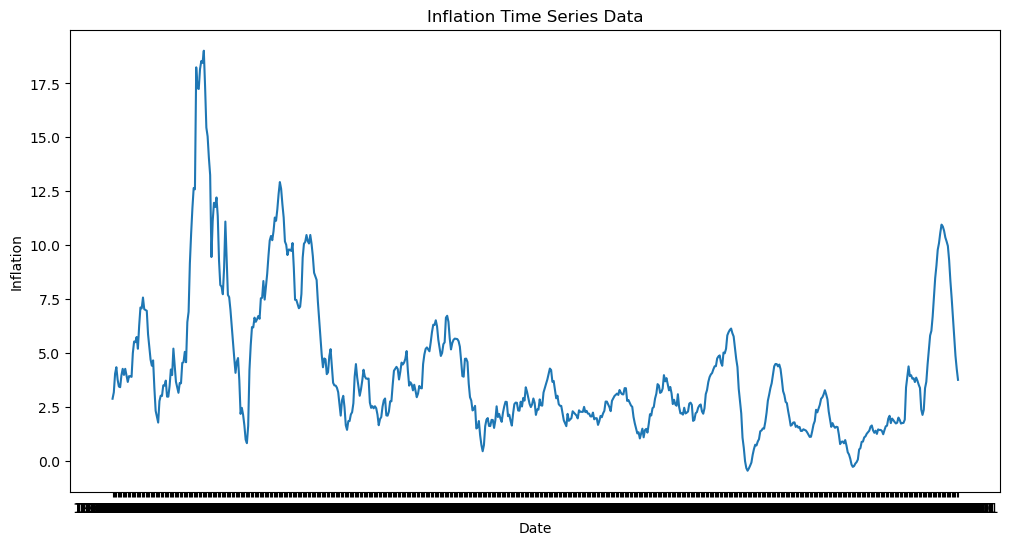

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(time_series['date'],time_series['inflation'])
plt.title('Inflation Time Series Data')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.show()

In [30]:
fig = px.line(time_series, x='date', y='inflation', title='Inflation Time Series Data',
              labels={'inflation': 'Inflation', 'date': 'Date'})

fig.show()


## Arima

In [31]:
#Stationary or not stationary?
pvalue = adfuller(time_series.inflation)[1]
if pvalue < 0.05:
    print('Values are stationary --> d = 1')
else:
    print('Values are non-stationary --> d > 1')

Values are stationary --> d = 1


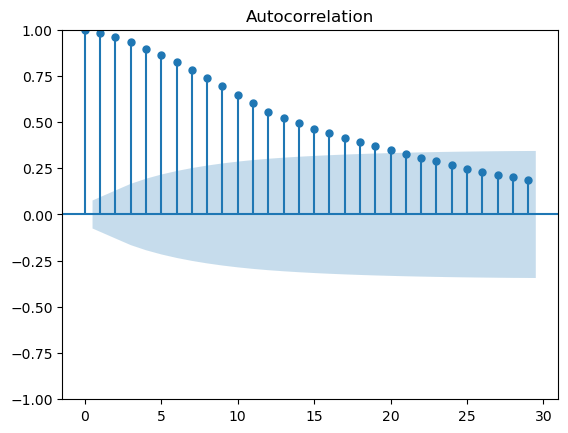

In [32]:
plot_acf(time_series.inflation)
plt.show()

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



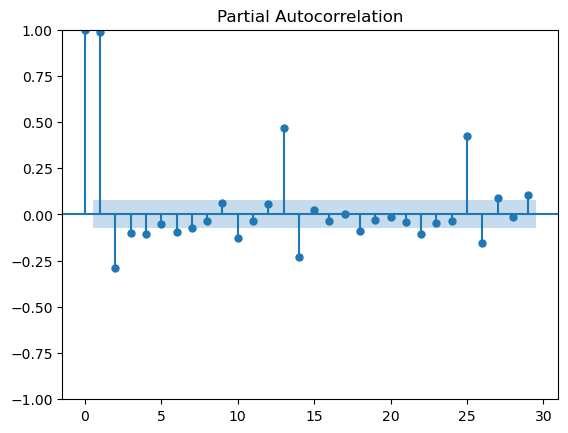

In [33]:
plot_pacf(time_series.inflation)
plt.show()

In [34]:
model=pm.auto_arima(time_series.inflation, seasonal=False, test='adf')
order=model.get_params()['order']
print(order)

(2, 0, 1)


### .forecast()

In [35]:
window_size = 12
forecast = np.empty(len(time_series['inflation']) - window_size)

for i in range(window_size, len(time_series['inflation'])):
    train_window = time_series['inflation'][:i]
    model_arima = ARIMA(train_window, order=order)
    model_fit = model_arima.fit()
    predicted = model_fit.forecast(step=1)
    forecast[i - window_size] = predicted



/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_1279/3826819711.py:9: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_1279/3826819711.py:9: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_1279/3826819711.py:9: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_1279/3826819711.py:9: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_1279/3826819711.py:9: FutureWarning:


In [36]:
print(forecast)

[ 3.57650405  3.56664681  4.05142475  3.79743576  3.81285458  4.98598905
  4.58825817  5.24089624  5.53439991  4.74192108  6.64040534  6.65288086
  7.16841706  7.48363593  6.63030711  7.1273502   6.62182659  5.49817335
  5.18904907  4.29812676  4.05564365  4.69489527  3.06812474  2.01707575
  1.82883055  1.65682245  2.8337931   3.15209289  3.17668539  3.72520978
  3.72591434  3.97426713  3.19048897  3.20507252  3.73678873  4.53203354
  4.22970726  5.47987786  4.64696667  3.85532561  3.5896678   3.34665378
  3.81022563  3.79144745  4.72472237  4.73488807  5.18721271  4.68793893
  6.47080882  6.88568482  8.84188925 10.91694111 12.1598174  13.04731549
 12.55486327 18.86973739 16.43717539 17.72262215 17.56548799 18.90823939
 17.93649356 19.31819685 16.94867429 15.65593888 14.61937841 14.17532039
 12.87140486  9.36235427 11.20895598 11.73271225 11.7240708  12.06940843
 11.13891962  9.01818733  8.12665189  7.98556868  7.66956689  9.05166448
 11.10931313  8.98896228  7.77062868  7.0767097   7

In [37]:
forecast=np.array(forecast)
mse=mean_squared_error(time_series.inflation[window_size:], forecast)
mae=mean_absolute_error(time_series.inflation[window_size:], forecast)
print('MSE: ',mse)
print('MAE: ',mae)

MSE:  0.30418445552402923
MAE:  0.3545523385837233


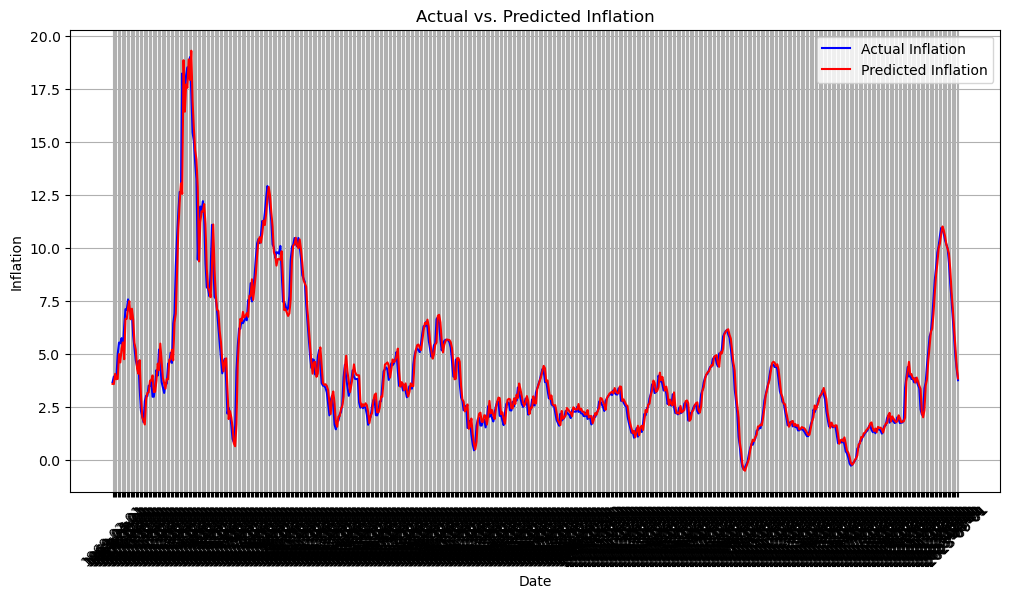

In [39]:
actual_inflation = time_series['inflation'][window_size:]
predicted_inflation = forecast
dates = time_series['date'][window_size:]

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_inflation, label='Actual Inflation', color='blue')
plt.plot(dates, predicted_inflation, label='Predicted Inflation', color='red')

plt.title('Actual vs. Predicted Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.show()


In [41]:
data=pd.DataFrame({'date':time_series['date'][window_size:],'actual':actual_inflation,'forecast':predicted_inflation})

In [42]:
print(data)

           date    actual  forecast
12   1969-02-01  3.651685  3.576504
13   1969-03-01  3.921569  3.566647
14   1969-04-01  3.910615  4.051425
15   1969-05-01  3.888889  3.797436
16   1969-06-01  4.986150  3.812855
..          ...       ...       ...
663  2023-05-01  6.644999  7.098939
664  2023-06-01  5.716123  6.177161
665  2023-07-01  4.865876  5.231823
666  2023-08-01  4.253652  4.392120
667  2023-09-01  3.750122  3.835444

[656 rows x 3 columns]


In [43]:
data.head(20)

,date,actual,forecast
12,1969-02-01,3.651685,3.576504
13,1969-03-01,3.921569,3.566647
14,1969-04-01,3.910615,4.051425
15,1969-05-01,3.888889,3.797436
16,1969-06-01,4.986150,3.812855
17,1969-07-01,5.524862,4.985989
18,1969-08-01,5.494505,4.588258
19,1969-09-01,5.737705,5.240896
20,1969-10-01,5.191257,5.534400
21,1969-11-01,6.267030,4.741921


### .predict()

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check 

MSE:  8.613396505287643
MAE:  2.446082826426841


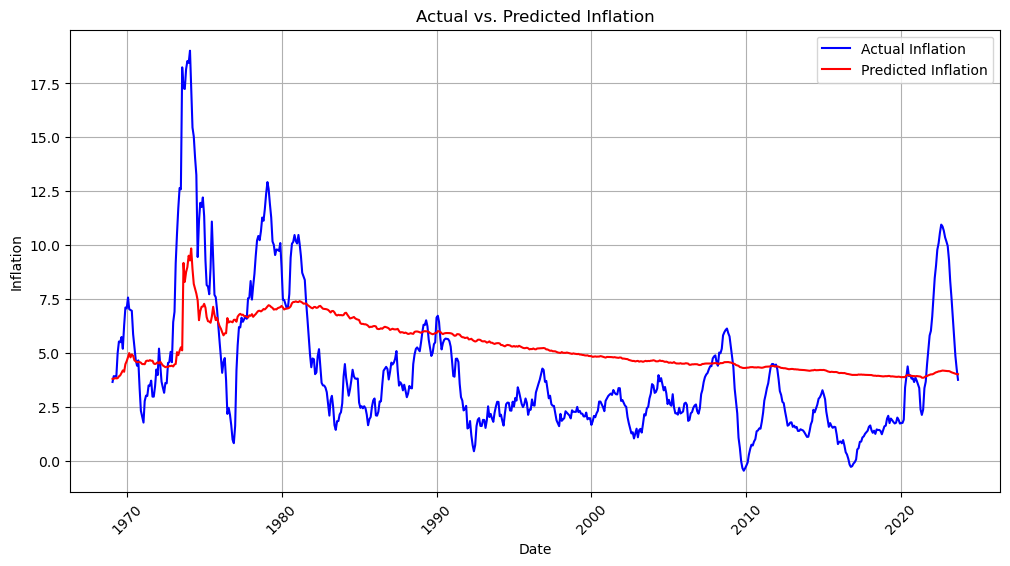

In [146]:
model=pm.auto_arima(time_series.inflation, seasonal=False, test='adf')
order=model.get_params()['order']

window_size = 12
forecast = np.empty(len(time_series['inflation']) - window_size)

for i in range(window_size, len(time_series['inflation'])):
    train_window = time_series['inflation'][:i]
    model_arima = ARIMA(train_window, order=order)
    model_fit = model_arima.fit()
    predicted = model_fit.predict(nsteps=1)
    forecast[i - window_size] = predicted[0]

forecast=np.array(forecast)
mse=mean_squared_error(time_series.inflation[window_size:], forecast)
mae=mean_absolute_error(time_series.inflation[window_size:], forecast)
print('MSE: ',mse)
print('MAE: ',mae)

actual_inflation = time_series['inflation'][window_size:]
predicted_inflation = forecast
dates = time_series['date'][window_size:]

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_inflation, label='Actual Inflation', color='blue')
plt.plot(dates, predicted_inflation, label='Predicted Inflation', color='red')

plt.title('Actual vs. Predicted Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.show()


## ARIMA Order Changes Every Year in January 

In [147]:
print(time_series.head(15))

         date  inflation
0  1968-02-01   2.873563
1  1968-03-01   3.170029
2  1968-04-01   4.034582
3  1968-05-01   4.335260
4  1968-06-01   3.757225
5  1968-07-01   3.438395
6  1968-08-01   3.409091
7  1968-09-01   3.954802
8  1968-10-01   4.261364
9  1968-11-01   3.977273
10 1968-12-01   4.261364
11 1969-01-01   3.966006
12 1969-02-01   3.651685
13 1969-03-01   3.921569
14 1969-04-01   3.910615


### .forecast()

In [148]:
window_size=12

model=pm.auto_arima(time_series.inflation, seasonal=False, test='adf')
order=model.get_params()['order']

forecast=np.empty(len(time_series['inflation']) - window_size)

for i in range(window_size, len(time_series['inflation'])):
    if time_series['date'][i].month == 1:
        model_auto_arima = pm.auto_arima(time_series['inflation'][:i], seasonal=False, test='adf')
        order = model_auto_arima.get_params()['order']

    train_window = time_series['inflation'][:i]

    model_arima = ARIMA(train_window, order=order)
    model_fit=model_arima.fit()

    predicted = model_fit.forecast(step=1)
    forecast[i - window_size] = predicted

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_16712/1257323306.py:19: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_16712/1257323306.py:19: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_16712/1257323306.py:19: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_16712/1257323306.py:19: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/8q/hyqzpcrx357g9qd6yqfg924h0000gn/T/ipykernel_16712/1257323306.py:19: Futur

In [149]:
forecast=np.array(forecast)
mse=mean_squared_error(time_series.inflation[window_size:], forecast)
mae=mean_absolute_error(time_series.inflation[window_size:], forecast)
print('MSE: ',mse)
print('MAE: ',mae)

MSE:  0.33754657854193565
MAE:  0.36308730111707477


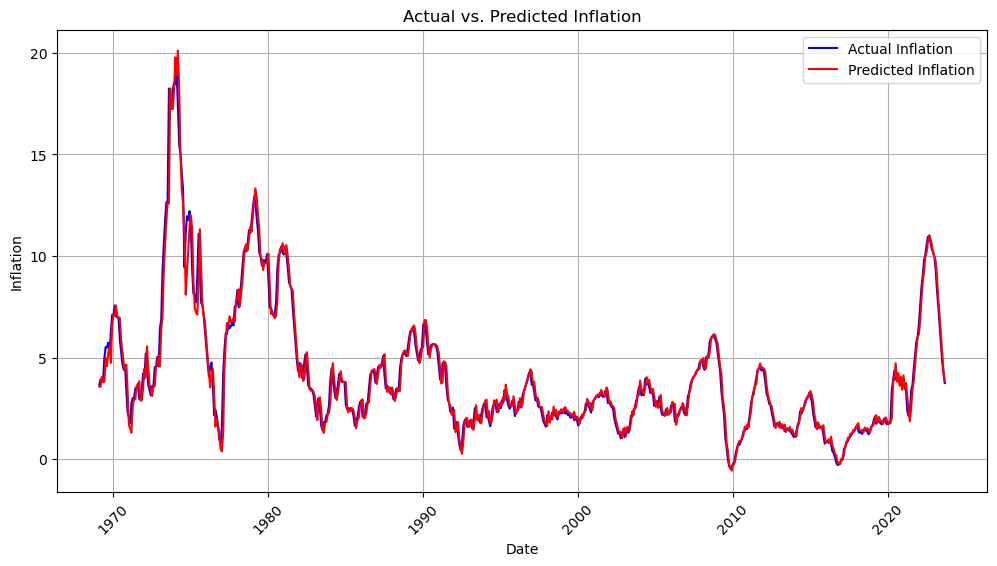

In [150]:
actual_inflation = time_series['inflation'][window_size:]
predicted_inflation = forecast
dates = time_series['date'][window_size:]

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_inflation, label='Actual Inflation', color='blue')
plt.plot(dates, predicted_inflation, label='Predicted Inflation', color='red')

plt.title('Actual vs. Predicted Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.show()


### .predict()

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/denizozbakir/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check 

MSE:  24.27912786406864
MAE:  3.786619673228062


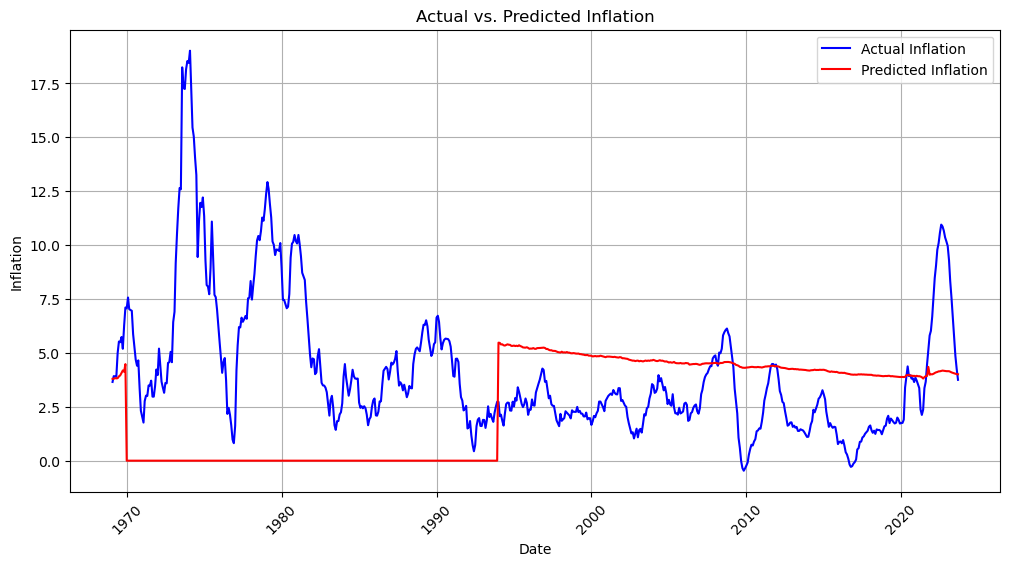

In [152]:
window_size=12

model=pm.auto_arima(time_series.inflation, seasonal=False, test='adf')
order=model.get_params()['order']

for i in range(window_size, len(time_series['inflation'])):
    if time_series['date'][i].month == 1:
        model_auto_arima = pm.auto_arima(time_series['inflation'][:i], seasonal=False, test='adf')
        order = model_auto_arima.get_params()['order']

    train_window = time_series['inflation'][:i]

    model_arima = ARIMA(train_window, order=order)
    model_fit=model_arima.fit()

    predicted = model_fit.predict(n_steps=1)
    forecast[i - window_size] = predicted[0]

forecast=np.array(forecast)
mse=mean_squared_error(time_series.inflation[window_size:], forecast)
mae=mean_absolute_error(time_series.inflation[window_size:], forecast)
print('MSE: ',mse)
print('MAE: ',mae)

actual_inflation = time_series['inflation'][window_size:]
predicted_inflation = forecast
dates = time_series['date'][window_size:]

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_inflation, label='Actual Inflation', color='blue')
plt.plot(dates, predicted_inflation, label='Predicted Inflation', color='red')

plt.title('Actual vs. Predicted Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.show()


## LSTM

*learning rate

In [12]:
train_size = int(0.8 * len(time_series.inflation))
train = time_series.iloc[:train_size, :]
test = time_series.iloc[train_size:, :]

print(train.shape)
print(test.shape)
train.head(15)

(534, 3)
(134, 3)


,Unnamed: 0,date,inflation
0,0,1968-02-01,2.873563
1,1,1968-03-01,3.170029
2,2,1968-04-01,4.034582
3,3,1968-05-01,4.335260
4,4,1968-06-01,3.757225
5,5,1968-07-01,3.438395
6,6,1968-08-01,3.409091
7,7,1968-09-01,3.954802
8,8,1968-10-01,4.261364
9,9,1968-11-01,3.977273


### Scaled Sliding Windows

In [14]:
time_series['date'] = pd.to_datetime(time_series['date'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series['inflation'].values.reshape(-1, 1))

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

window_size = 12
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
print(f'Train Score: {train_score:.2f} RMSE')
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Test Score: {test_score:.2f} RMSE')



Epoch 1/100
521/521 - 2s - loss: 0.0089 - 2s/epoch - 4ms/step
Epoch 2/100
521/521 - 1s - loss: 0.0027 - 729ms/epoch - 1ms/step
Epoch 3/100
521/521 - 1s - loss: 0.0024 - 791ms/epoch - 2ms/step
Epoch 4/100
521/521 - 1s - loss: 0.0020 - 689ms/epoch - 1ms/step
Epoch 5/100
521/521 - 1s - loss: 0.0017 - 709ms/epoch - 1ms/step
Epoch 6/100
521/521 - 1s - loss: 0.0021 - 733ms/epoch - 1ms/step
Epoch 7/100
521/521 - 1s - loss: 0.0015 - 764ms/epoch - 1ms/step
Epoch 8/100
521/521 - 1s - loss: 0.0016 - 797ms/epoch - 2ms/step
Epoch 9/100
521/521 - 1s - loss: 0.0015 - 666ms/epoch - 1ms/step
Epoch 10/100
521/521 - 1s - loss: 0.0015 - 678ms/epoch - 1ms/step
Epoch 11/100
521/521 - 1s - loss: 0.0016 - 664ms/epoch - 1ms/step
Epoch 12/100
521/521 - 1s - loss: 0.0012 - 685ms/epoch - 1ms/step
Epoch 13/100
521/521 - 1s - loss: 0.0014 - 668ms/epoch - 1ms/step
Epoch 14/100
521/521 - 1s - loss: 0.0012 - 667ms/epoch - 1ms/step
Epoch 15/100
521/521 - 1s - loss: 0.0013 - 676ms/epoch - 1ms/step
Epoch 16/100
521/521 -

In [15]:
print(X_train.shape)
print(X_test.shape)


(521, 1, 12)
(121, 1, 12)


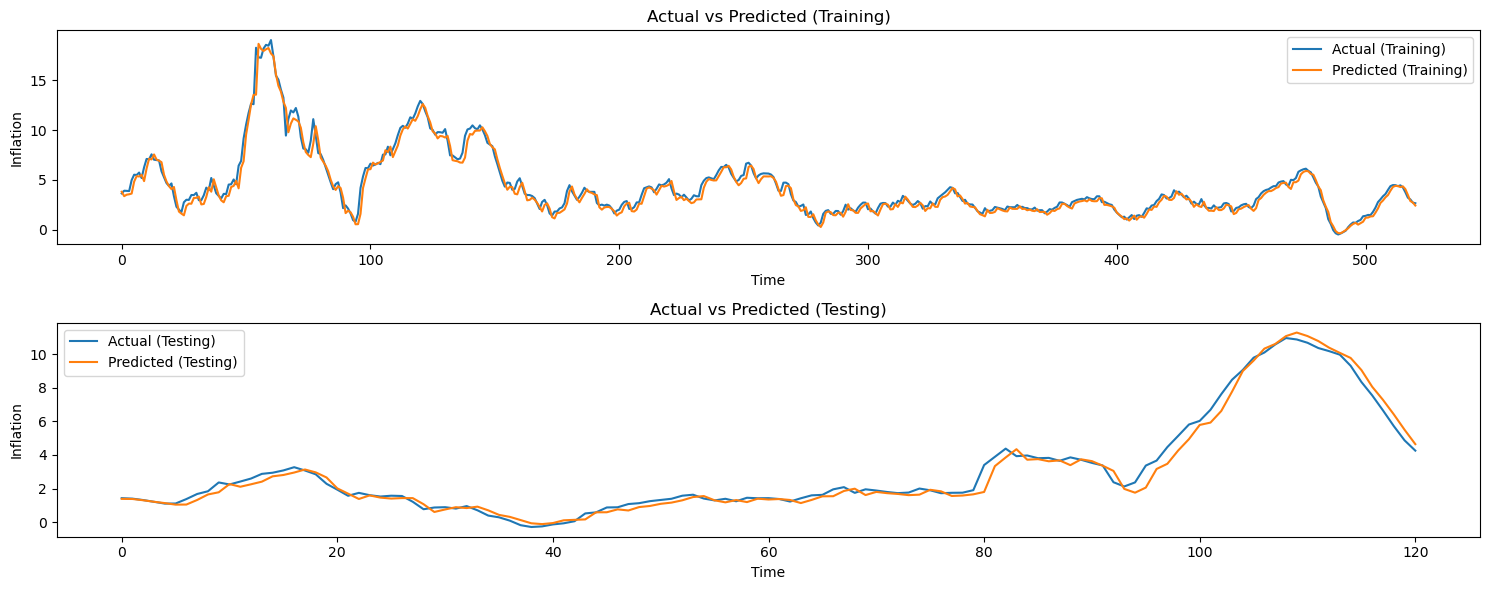

In [16]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(y_train[0], label='Actual (Training)')
plt.plot(train_predict[:, 0], label='Predicted (Training)')
plt.title('Actual vs Predicted (Training)')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y_test[0], label='Actual (Testing)')
plt.plot(test_predict[:, 0], label='Predicted (Testing)')
plt.title('Actual vs Predicted (Testing)')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
print(X_train)

[[[0.17141766 0.1866354  0.23101337 ... 0.22807165 0.24265419 0.22749331]]

 [[0.1866354  0.23101337 0.24644733 ... 0.24265419 0.22749331 0.21135908]]

 [[0.23101337 0.24644733 0.21677651 ... 0.22749331 0.21135908 0.22521233]]

 ...

 [[0.18096494 0.1966811  0.20823997 ... 0.24194759 0.2174522  0.18954284]]

 [[0.1966811  0.20823997 0.22927379 ... 0.2174522  0.18954284 0.18026688]]

 [[0.20823997 0.22927379 0.2486782  ... 0.18954284 0.18026688 0.16401286]]]


### Not Scaled Sliding Windows

In [21]:
time_series['date'] = pd.to_datetime(time_series['date'])

def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

train_size = int(len(time_series['inflation']) * 0.80)
test_size = len(time_series['inflation']) - train_size

train = time_series['inflation'][0:train_size]
test = time_series['inflation'][train_size:len(time_series['inflation'])]

train_array = train.to_numpy().reshape(-1, 1)
test_array = test.to_numpy().reshape(-1, 1)

X_train, y_train = create_dataset(train_array, window_size)
X_test, y_test = create_dataset(test_array, window_size)


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_score = np.sqrt(mean_squared_error(y_train, train_predict[:, 0]))
print(f'Train Score: {train_score:.2f} RMSE')
test_score = np.sqrt(mean_squared_error(y_test, test_predict[:, 0]))
print(f'Test Score: {test_score:.2f} RMSE')



Epoch 1/50
521/521 - 2s - loss: 5.7593 - 2s/epoch - 5ms/step
Epoch 2/50
521/521 - 1s - loss: 2.3792 - 706ms/epoch - 1ms/step
Epoch 3/50
521/521 - 1s - loss: 1.5170 - 654ms/epoch - 1ms/step
Epoch 4/50
521/521 - 1s - loss: 1.2014 - 680ms/epoch - 1ms/step
Epoch 5/50
521/521 - 1s - loss: 1.0117 - 676ms/epoch - 1ms/step
Epoch 6/50
521/521 - 1s - loss: 0.8828 - 652ms/epoch - 1ms/step
Epoch 7/50
521/521 - 1s - loss: 0.8733 - 650ms/epoch - 1ms/step
Epoch 8/50
521/521 - 1s - loss: 0.8463 - 652ms/epoch - 1ms/step
Epoch 9/50
521/521 - 1s - loss: 0.7605 - 653ms/epoch - 1ms/step
Epoch 10/50
521/521 - 1s - loss: 0.7238 - 655ms/epoch - 1ms/step
Epoch 11/50
521/521 - 1s - loss: 0.6321 - 652ms/epoch - 1ms/step
Epoch 12/50
521/521 - 1s - loss: 0.5647 - 652ms/epoch - 1ms/step
Epoch 13/50
521/521 - 1s - loss: 0.5453 - 680ms/epoch - 1ms/step
Epoch 14/50
521/521 - 1s - loss: 0.5379 - 655ms/epoch - 1ms/step
Epoch 15/50
521/521 - 1s - loss: 0.5479 - 656ms/epoch - 1ms/step
Epoch 16/50
521/521 - 1s - loss: 0.54

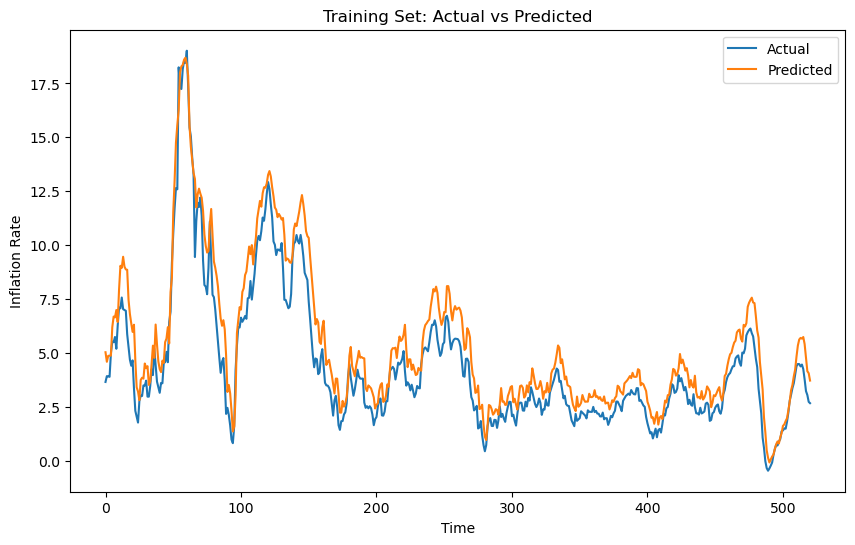

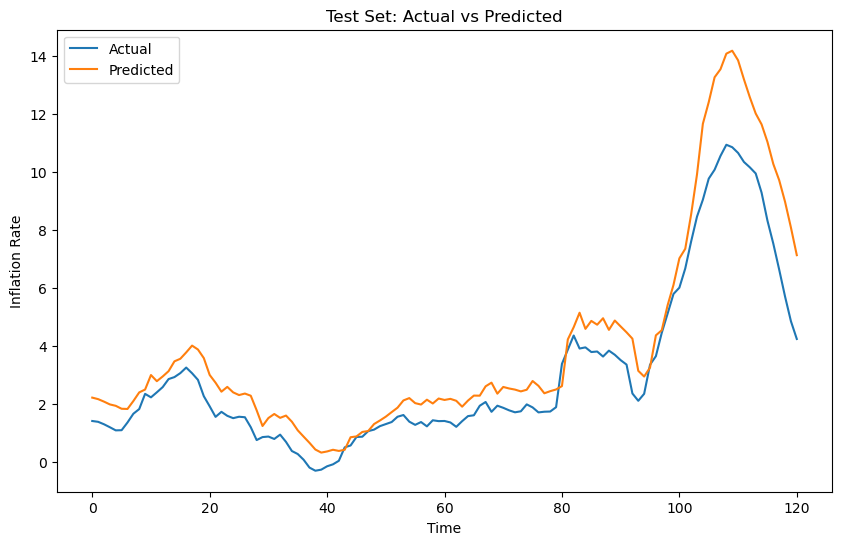

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual')
plt.plot(train_predict[:, 0], label='Predicted')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predict[:, 0], label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()


### LSTM Expanding Windows ????

In [ ]:
steps=12

model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)


## Prophet

In [ ]:
model_prophet = Prophet()
model_prophet.fit(train)
future = model_prophet.make_future_dataframe(periods=12, freq='M')
forecast = model_prophet.predict(future)

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(y_train[0], label='Actual')
plt.plot(train_predict[:, 0], label='Predicted')
plt.title('Actual vs Predicted (Training)')
plt.xlabel('Time')
plt.ylabel('Inflation')
plt.legend()


plt.tight_layout()
plt.show()
